In [1]:
import pymc3 as pm
import numpy as np

In [ ]:
r = list(range(2, 15))
lowers = np.zeros(shape=len(r))
uppers = np.zeros(shape=len(r))
for i, size in enumerate(r):
    data = np.random.normal(loc=100, scale=1, size=size)
    with pm.Model() as model:
        mu = pm.Uniform('mu', -10000, 10000)  # Really uninformative priors
        sig = pm.Uniform('sig', 0, 10000)
        # mu = pm.Flat('mu')
        # sig = pm.Exponential('sigma', lam=5)

        like = pm.Normal('likelihood', mu=mu, sd=sig, observed=data)

        trace = pm.sample(2000, start=pm.find_MAP(), step=pm.NUTS())
        
        lower, upper = np.percentile(trace.mu, [2.5, 97.5])
        
    lowers[i] = lower
    uppers[i] = upper

Applied interval-transform to mu and added transformed mu_interval_ to model.
Applied interval-transform to sig and added transformed sig_interval_ to model.


In [4]:
lowers

array([ 99.03550839,  99.10619973,  98.20174824,  98.63230022,
        99.66091112,  99.67775196])

In [5]:
uppers

array([ 101.69052996,  101.07214142,   99.26785045,  100.39052116,
        101.37915455,  100.6889667 ])

In [6]:
uppers - lowers

array([ 2.65502157,  1.96594169,  1.06610221,  1.75822094,  1.71824344,
        1.01121474])

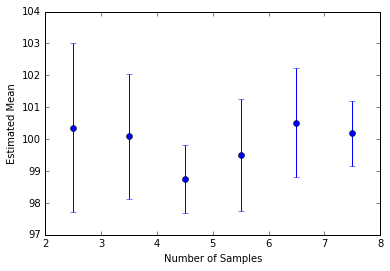

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.bar(np.arange(len(uppers))+2, (uppers + lowers) / 2)
plt.errorbar(np.arange(len(uppers))+2.5, (uppers + lowers) / 2, yerr=(uppers - lowers), marker='o', ls='none')
plt.ylabel('Estimated Mean')
plt.xlabel('Number of Samples')
# plt.xlim(2, len(uppers)+2)
# plt.yscale('log')
# plt.ylim(0, 20)

How to decide how many samples? When does the 95% HPD converge? When is the HPD width some percentage? Is this a qualitative, rather than quantitative decision?